# Semester 4 Coding Portfolio Part 2: Regression for Count Data

This notebook covers the following topics:
 - Cleaning count data
 - Linear regression of count data
 - Log-linear regression
 - Poisson regression

This notebook is expected to take around 20 hours to complete:
 - 4 hours for the formative part
 - 6 hours of self-study on the topics covered by this notebook
 - 10 hours for the summative part of this notebook

Like all notebooks in this portfolio, it is split into two sections:
 - Formative 
 - Summative

<b>Formative section</b><br>
Simply complete the given functions! You may ask for help from fellow students and TAs on this section, and solutions might be provided later on.

<b>Summative section</b><br>
In this section, you are asked to do original work with little guidance, based on the skills you learned in the formative part (as well as lectures and workshops).
This section is graded not just on passing automated tests, but also on quality, originality, and effort (see assessment criteria in the assignment description).

In [37]:
# TODO: Please enter your student number here
STUDENT_NUMBER = 14806762

# Formative Section
Please do not add additional cells to this section, and do not delete given code. Simply fill out the code or answer questions in the given cells.

### Part 1: Load and clean data
In this workbook we are going to build a model to predict the expected number of individuals killed from a terrorist attack. The occasion in which this would be used would be the moment a terrorism event would happen, a relevant intelligenece organisation might be tasked to generate an estimate for the expected severity of the event. 

When you replicate this workbook with your own data, I'd like to see evidence of you iterating over what model to use, which covariates to include and whether any interactions of non-linearities (e.g. including a squared term) should be included. Here we will use a very simple model which will not fit the data extremely well, but focus on interpretation of coefficients and choosing the correct `data generating process` (i.e. the correct likelihood function and / or transformation to apply to the data before fitting). 

In [38]:
# Import Necessary Libraries
import os
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import multivariate_normal, bernoulli, beta, norm
from scipy.stats import ks_2samp
from scipy.special import expit as logistic_sigmoid
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, brier_score_loss, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Set display option to avoid scientific notation in pandas, show up to 5 decimal points
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# and numpy
np.set_printoptions(suppress=True, precision=5)

In [39]:
# Load the clean terrorism dataset (same dataset as for notebook 1)
df = pd.read_csv('sem4_portfolio_1_data.csv', low_memory=False)

Explore the distribution of `nkill`, the number of people killed in a given terrorism incident. Specifically, plot a histogram of of the variable.

In [40]:
# TODO 1: Look at the first 1000 cases to get a tangible idea of what we are working with

first_1000_cases = df['nkill'][:1000].dropna().astype(int).head(1000).to_list()

#. Your solution here ...

print(first_1000_cases)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 7, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0

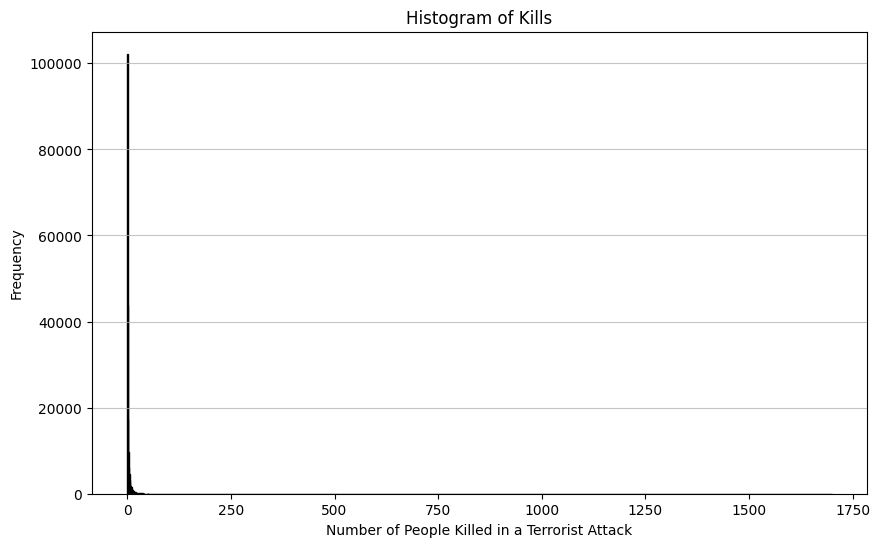

In [41]:
# TODO 2: Plot the histogram

#. Your solution here ...

plt.figure(figsize=(10, 6))
plt.hist(df['nkill'], bins=np.arange(min(df['nkill']), max(df['nkill']) + 1, 1)-0.5, color='skyblue', edgecolor='black')
plt.title('Histogram of Kills')
plt.xlabel('Number of People Killed in a Terrorist Attack')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
# plt.yscale("log")
plt.show()


What can you say about the distribution?

#!# BEGIN ANSWER
The distribution of number of individuals killed in terrorism incidents is clearly skewed and peaked on 0, as most terrorist attacks do not cause any deaths. The distribution is non-Gaussian.
#!# END ANSWER

Take the log of nkill. Apply any necessary transformation to the data for this to work.

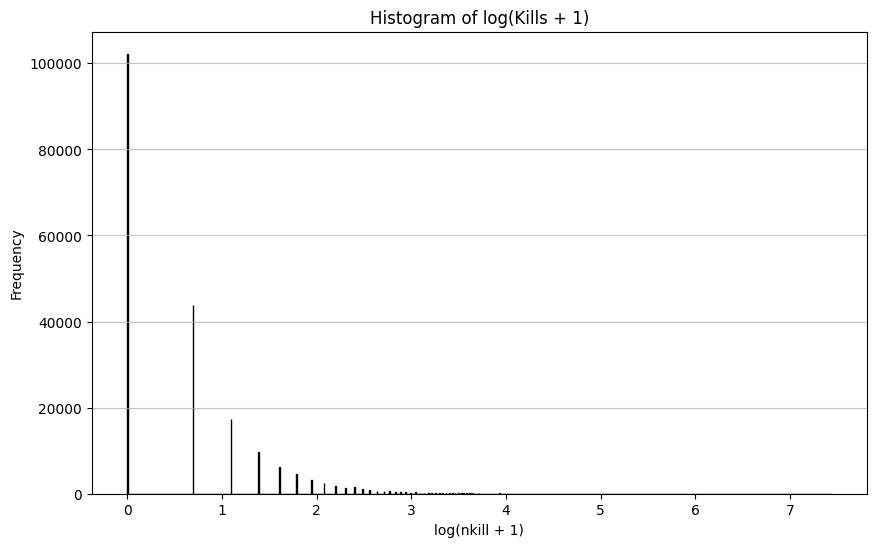

In [42]:
# TODO 3: Plot the histogram of the log of nkill

#. Your solution here ...

plt.figure(figsize=(10, 6))
plt.hist(np.log(df['nkill']+1), bins=1000, color='skyblue', edgecolor='black')
plt.title('Histogram of log(Kills + 1)')
plt.xlabel('log(nkill + 1)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

What can you say about the resulting distribution? 

#!# BEGIN ANSWER
The distribution is still skewed and non-normal, however it is less peaked and exhibits a more half-normal character. It is still a clearly non-Gaussian distribution. 
#!# END ANSWER

### Part 2: Linear Regression

A naive approach to modeling this data may still be to use linear regression, and hence assume a normal distribution around the dependent variable. Note that, implicitly, assuming a normal around the dependent variable actually entails that your `residuals` -- so what is left of the variability in your dependent variable after netting the `systematic` component -- should be normally distributed:

$Y_i \sim N(mu_i, \sigma^2) \rightarrow (Y_i - mu_i) \sim N(0,\sigma^2)$

There are formal tests to see if your model's assumptions (here i. conditional independnce of each observation; ii. constant variance (homoskedasticity); iii. normality of errors; iv. linearity in parameters). The branch of statistics you are being taught does not obsess over these assumptions, and simply asks: `which model fits the data best ?`. So instead of testing assumptions we just fit different models and compare the `generalisation error`. In what follows for simplicity we compare models with in-sample performance, but this comparison of error metrics would be more effective / legitimate if applied to out-of-sample data. 

Select some variable which you should include in the model. Include `terrorist.org`.

In [43]:
# Let's create a cbrn variable (no nuclear in the sample (un?)fortunately )
df['weapon.type_cbrn'] = df['weapon.type_chemical'] +  df['weapon.type_biological'] +  df['weapon.type_radiological']  

# TODO 4: Assuming 'df' is your DataFrame containing the dataset "nkill"
# Select relevant variables including the target variable

data = df[['nkill',
           'suicide', 
           'nperps', 
           'terrorist.org',
           'weapon.type_explosives', 
           'weapon.type_incendiary',
           'weapon.type_firearms',
           'weapon.type_cbrn',
           'weapon.type_melee',
           'weapon.type_sabotage.equipment',
           'weapon.type_vehicle..not.to.include.vehicle.borne.explosives..i.e...car.or.truck.bombs.',
           'weapon.type_fake.weapons',
           'attack.type_assassination',
           'attack.type_hostage.taking..kidnapping.',
           'attack.type_facility.infrastructure.attack',
           'attack.type_armed.assault',
           'attack.type_hijacking',
           'attack.type_unarmed.assault',
           'attack.type_hostage.taking..barricade.incident.',
           'target.type_government..diplomatic.',
           'target.type_journalists...media',
           'target.type_police',
           'target.type_utilities',
           'target.type_military',
           'target.type_government..general.',
           'target.type_airports...aircraft',
           'target.type_business',
           'target.type_educational.institution',
           'target.type_violent.political.party',
           'target.type_religious.figures.institutions',
           'target.type_transportation',
           'target.type_tourists',
           'target.type_ngo',
           'target.type_telecommunication',
           'target.type_food.or.water.supply',
           'target.type_terrorists.non.state.militia',
           'target.type_other',
           'target.type_maritime',
           'target.type_abortion.related'
          ]]

#. Your solution here ...

Pick some terrorist organisations to include in the model. One option is to identify the 10 (?) most frequent, group all those outside this group into a new class `other`. Make sure you edit the `terrorist.org` variable to reflect this. 

Elbow point at: 27


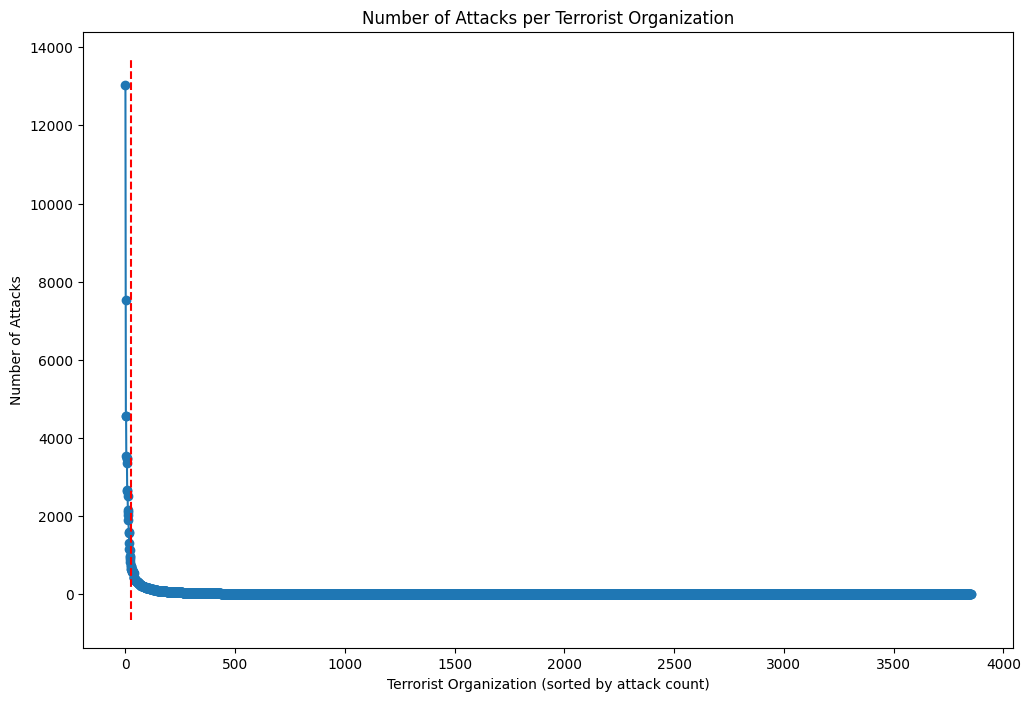

In [44]:
from kneed import KneeLocator

# TODO 5: Exclude unknown organizations
# Count the number of attacks per organization excluding 'Unknown'
# Prepare data for use with Kneedle algorithm
# Use KneeLocator to find the elbow point

df_filtered = df[df['terrorist.org'] != 'Unknown']

attacks_per_org = df_filtered['terrorist.org'].value_counts().sort_values(ascending=False)

x = range(1, len(attacks_per_org) + 1)
y = attacks_per_org.values

knee = KneeLocator(x, y, curve="convex", direction="decreasing")
elbow_point = knee.elbow
#. Your solution here ...

print(f"Elbow point at: {elbow_point}")

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(x, y, marker='o', linestyle='-')
plt.vlines(elbow_point, plt.ylim()[0], plt.ylim()[1], linestyles='dashed',color = 'red')
plt.xlabel('Terrorist Organization (sorted by attack count)')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks per Terrorist Organization')

plt.show()

In [45]:
# TODO 6: Identify the most common orgs (you should have some code before this that allows you to identify these by frequency or otherwise)

most_common_orgs = attacks_per_org.index.to_list()[:elbow_point]

#. Your solution here ...

# Modify the df['terrorist.org'] column
# Check if each value is in the most_common_orgs list, otherwise replace it with 'other'
df['terrorist.org'] = df['terrorist.org'].apply(lambda org: org if org in most_common_orgs else 'other')

Now create your design matrix and you dependent variable vector. Ensure you include terrorist.org, one-hot encode it and drop the first (most frequent) org (the Taliban). This will serve as your reference. Drop incomplete records. To ensure a successful model fit, drop columns that have 0 variance and those which exhibit multicollinearity. Standardise your covariates. 

In [46]:
# TODO 7: Select predictors and target variable before dropping missing values
X = df[[
    'nkill',
    'suicide', 
    'nperps',
    'terrorist.org',
    'weapon.type_explosives', 
    'weapon.type_incendiary',
    'weapon.type_firearms',
    'weapon.type_cbrn',
    'weapon.type_melee',
    'weapon.type_sabotage.equipment',
    'weapon.type_vehicle..not.to.include.vehicle.borne.explosives..i.e...car.or.truck.bombs.',
    'weapon.type_fake.weapons',
    'attack.type_assassination',
    'attack.type_hostage.taking..kidnapping.',
    'attack.type_facility.infrastructure.attack',
    'attack.type_armed.assault',
    'attack.type_hijacking',
    'attack.type_unarmed.assault',
    'attack.type_hostage.taking..barricade.incident.',
    'target.type_government..diplomatic.',
    'target.type_journalists...media',
    'target.type_police',
    'target.type_utilities',
    'target.type_military',
    'target.type_government..general.',
    'target.type_airports...aircraft',
    'target.type_business',
    'target.type_educational.institution',
    'target.type_violent.political.party',
    'target.type_religious.figures.institutions',
    'target.type_transportation',
    'target.type_tourists',
    'target.type_ngo',
    'target.type_telecommunication',
    'target.type_food.or.water.supply',
    'target.type_terrorists.non.state.militia',
    'target.type_other',
    'target.type_maritime',
    'target.type_abortion.related']] # df[['nkill', ...]]

# Drop rows with missing values in any selected variable or the target
data_cleaned = X.dropna(axis=0, how='any')

#. Your solution here ...

# Separate predictors and target variable after cleaning
y_cleaned = data_cleaned['nkill']
y_log_cleaned = np.log(data_cleaned['nkill']+1)
X_cleaned = data_cleaned.drop(columns=['nkill'])

In [47]:
# TODO 8: One-hot encoding categorical variables and dropping the first dummy to avoid multicollinearity
X_encoded = pd.get_dummies(X_cleaned, columns=['terrorist.org'], drop_first=True).astype(int)

#. Your solution here ...

In [48]:
# Drop variables with 0 variability (no information) (I will do this for you because you haven't used this before)

# VarianceThreshold with a threshold of 0 (default) to remove 0 variance columns
selector = VarianceThreshold()
X_encoded_var_filtered = selector.fit_transform(X_encoded)
# Get the columns after variance thresholding
X_encoded_var_filtered = X_encoded.iloc[:, selector.get_support(indices=True)]

In [49]:
# Calculate the correlation matrix (absolute value - we don't care about direction of correlation)
corr_matrix = X_encoded_var_filtered.corr().abs()

# Select upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Initialize an empty list to keep track of columns to drop
to_drop = []

# Iterate over the columns of the upper triangle
for column in upper_tri.columns:
    for row in upper_tri.index:
        # Check if the correlation is above the threshold and the column hasn't been considered yet
        if upper_tri.loc[row, column] > 0.9 and column not in to_drop and row not in to_drop:
            to_drop.append(column)
            break  # Break the loop once a column is marked for dropping

# 'to_drop' contains columns where only one of each highly correlated pair is considered for dropping

In [50]:
# TODO 9: Drop highly correlated features 
X_encoded_final = X_encoded_var_filtered.drop(columns=to_drop)

#. Your solution here ...

In [51]:
# Standardise features to help with interpretation (Again I will do this for you because you haven't seen this before.)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_encoded_final)

# Apply transform to both the training set and the test set
X_train_scaled = pd.DataFrame(scaler.transform(X_encoded_final), columns=X_encoded_final.columns, index=X_encoded_final.index)

Fit a linear regression model to the data. Print the summary and a histogram of the residuals. Is it normally distributed ? 

In [52]:
# TODO 10: Adding a constant for the intercept
X_encoded_with_const = sm.add_constant(X_train_scaled)

#. Your solution here ...

In [53]:
from IPython.core.display import display, HTML
# This should help you visualise all your coefficients if you have many
display(HTML("<style>.container { width:90% !important; }</style>"))

# TODO 11: Fitting the linear regression model
model = sm.OLS(y_cleaned, X_encoded_with_const).fit()

#. Your solution here ...

# Displaying the regression results
print(model.summary())

/var/folders/2g/xfsvxxmd2158x4mn_qg2ycpr0000gn/T/ipykernel_37242/1092368963.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


                            OLS Regression Results                            
Dep. Variable:                  nkill   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     33.21
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:39:07   Log-Likelihood:            -1.3656e+05
No. Observations:               32775   AIC:                         2.732e+05
Df Residuals:                   32710   BIC:                         2.738e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

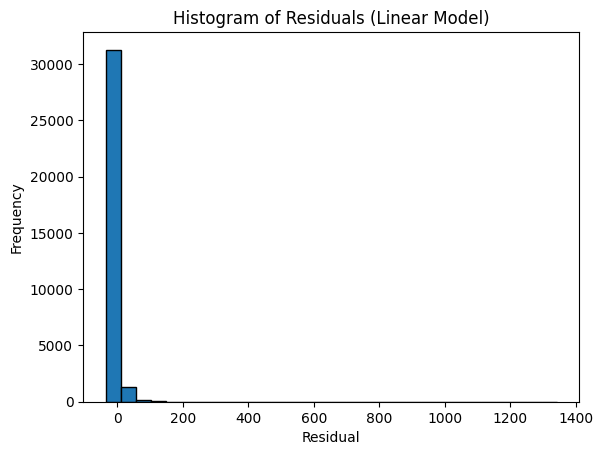

In [54]:
# Plotting histogram of residuals
residuals = model.resid
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Linear Model)')
plt.show()

#### v. Simulate 1000 values from the joint posterior distribution of the regression coefficients. 

In [55]:
# TODO 12: extract regression coefficients and covariance matrix

# Regression coefficients
coefficients = model.params 

# Covariance matrix
cov_matrix = model.cov_params()

# Number of simulations
n_simulations = 1000

# Simulate beta coefficients
simulated_betas = np.random.multivariate_normal(coefficients, cov_matrix, size=n_simulations)

#. Your solution here ...

Use a `violin plot` to display the distrubution and point-estimates of the most `statistically significant` coefficients. To pick the most significant coefficients, you can use a rule of thumb as harsh as Pr(beta>0)>0.975 | Pr(beta>0)<0.025, or as laxed as Pr(beta>0)>0.8 | Pr(beta>0)<0.2.

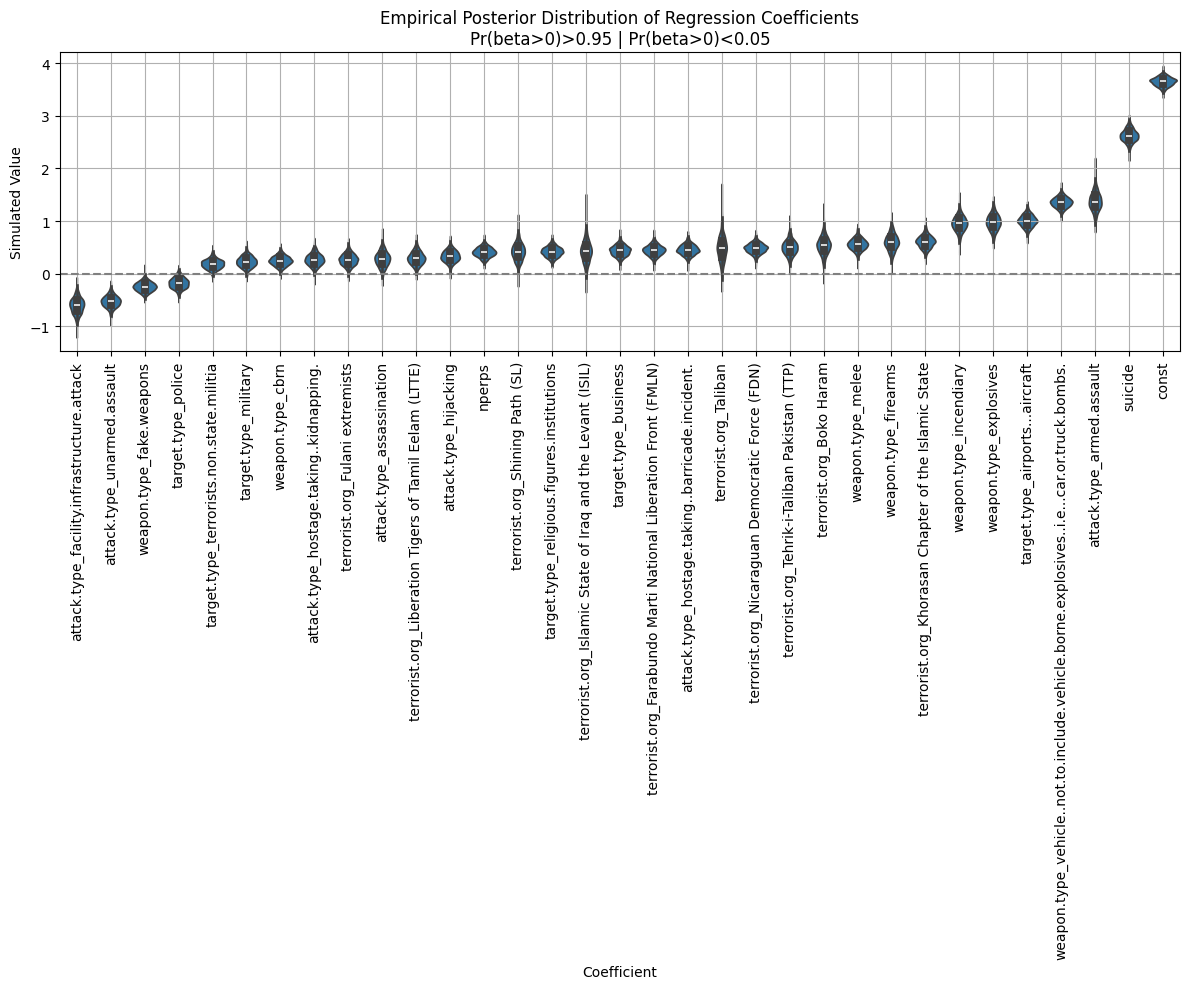

In [56]:
# # # I will do this for you on this instance, you have to repeat it for the following regressions. 

# Transform simulated_betas into a DataFrame for plotting
simulations_df = pd.DataFrame(simulated_betas, columns=model.params.index)

# Convert the DataFrame from wide to long format
long_df = simulations_df.melt(var_name='Coefficient', value_name='Value')

# Calculate the probability of coef > 0 for each coefficient
prob_greater_than_zero = long_df.groupby('Coefficient')['Value'].apply(lambda x: np.mean(x > 0)).reset_index()
prob_greater_than_zero.rename(columns={'Value': 'P(coef>0)'}, inplace=True)

# Filter coefficients based on the probability criterion
filtered_coefs = prob_greater_than_zero[
    (prob_greater_than_zero['P(coef>0)'] > 0.95) | (prob_greater_than_zero['P(coef>0)'] < 0.05)
]['Coefficient']

# Filter the long_df to include only the selected coefficients
filtered_long_df = long_df[long_df['Coefficient'].isin(filtered_coefs)]

# Calculate the median of the simulated values for each filtered coefficient
medians = filtered_long_df.groupby('Coefficient')['Value'].median().reset_index()

# Sort the filtered medians
medians_sorted = medians.sort_values(by='Value')

# Plotting the filtered and ordered coefficients
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.violinplot(x='Coefficient', y='Value', data=filtered_long_df, order=medians_sorted['Coefficient'])

# Add a vertical dotted line at x = 0
plt.axhline(y=0, color='grey', linestyle='--')

# Additional customization
plt.title('Empirical Posterior Distribution of Regression Coefficients\nPr(beta>0)>0.95 | Pr(beta>0)<0.05')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.xlabel('Coefficient')
plt.ylabel('Simulated Value')
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

Draw 1000 samples from the posterior predictive distribution of $y$. 

In [57]:
# Initialize an array to store predictions from each simulation
predicted_counts = np.zeros((n_simulations, X_encoded_with_const.shape[0]))

# TODO 13: Generate predictions for each simulation
# Loop over the number of simulations
# 1. Calculate the predicted rate for each simulation using the simulated coefficients and the data
# 2. Generate the predicted counts by sampling from a normal distribution with the predicted rate and the model scale 
# 3. fill in the i-th position of predicted_counts with the predicted counts 
for i in range(n_simulations):
    beta_simulation = simulated_betas[i]
    predicted_rate = X_encoded_with_const @ beta_simulation
    # Uncomment next line
    predicted_counts[i] = np.random.normal(predicted_rate,np.sqrt(model.scale))


#. Your solution here ...

Calculate the monte-carlo medians and prediction intervals. Based on these, calculate the point estimate correlation, rmse, bias and coverage. 

In [58]:
# TODO 14: Hint: Look back at your 1st workshop on linear regression
monte_carlo_medians = np.median(predicted_counts, axis=0)   # np.median(...)
prediction_intervals = np.percentile(predicted_counts, [2.5, 97.5], axis=0)  # np.percentile(...)


# Calculate metrics
correlation = np.corrcoef(monte_carlo_medians, y_cleaned)[0, 1]   # np.corrcoef(...)[0, 1]
rmse = np.sqrt(mean_squared_error(y_cleaned, monte_carlo_medians))          # np.sqrt(mean_squared_error(...))
bias = np.mean(monte_carlo_medians - y_cleaned)          # np.mean(...)  # Mean prediction error
coverage = np.mean((y_cleaned >= prediction_intervals[0,:]) & (y_cleaned <= prediction_intervals[1,:]))      # np.mean((...) & (...))

#. Your solution here ...

Plot the predicted values against the observed values of $y$. Display the error metrics above in the legend. 

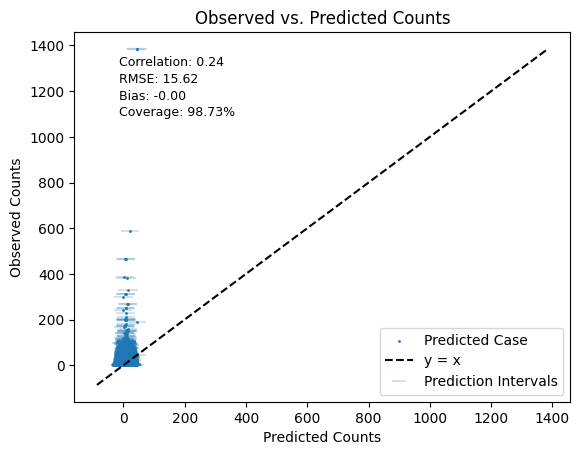

In [59]:
# # # I'll do this one for you...

# Find overall min and max for xlim and ylim
# Flatten predicted_samples to make it 1-dimensional
predicted_counts_flat = predicted_counts.flatten()
# Concatenate the flattened predicted_samples with y
combined_array = np.concatenate([predicted_counts_flat, y_cleaned])


# calculate min and max
min_val = combined_array.min()
max_val = combined_array.max()

# Plotting
scatter = plt.scatter(monte_carlo_medians, y_cleaned, s=1, alpha=1, label='Predicted Case')
errorbar = plt.errorbar(monte_carlo_medians, y_cleaned, xerr=np.abs(prediction_intervals - monte_carlo_medians), fmt='none', alpha=0.2, label='Prediction Intervals')
y_equals_x = plt.plot([min_val, max_val], [min_val, max_val], 'k--', zorder=3, label='y = x')

# Add legend with metrics
legend_labels = [
    f'Correlation: {correlation:.2f}',
    f'RMSE: {rmse:.2f}',
    f'Bias: {bias:.2f}',
    f'Coverage: {coverage:.2%}'
]

# Add legend for plot elements
plt.legend(loc='lower right')

# Text annotations for metrics
text_x = min_val + (max_val - min_val) * 0.05  # Adjust these positions as necessary
text_y_start = max_val - (max_val - min_val) * 0.05  # Starting y position for text
line_height = (max_val - min_val) * 0.05  # Adjust line height as necessary

for i, label in enumerate(legend_labels):
    plt.text(text_x, text_y_start - i * line_height, label, fontsize=9)

plt.title('Observed vs. Predicted Counts')
plt.xlabel('Predicted Counts')
plt.ylabel('Observed Counts')
plt.show()


### Part 3: Log-Linear Regression

Repeat the above from the model fitting onwards, but change the dependent variable to be on the log-scale. Apply any transformation you see fit to achieve this. 

In [60]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

# TODO 15: Fitting the linear regression model
model = sm.OLS(y_log_cleaned, X_encoded_with_const).fit()

#. Your solution here ...

# Displaying the regression results
print(model.summary())

/var/folders/2g/xfsvxxmd2158x4mn_qg2ycpr0000gn/T/ipykernel_37242/744660287.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


                            OLS Regression Results                            
Dep. Variable:                  nkill   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     244.3
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:39:17   Log-Likelihood:                -38057.
No. Observations:               32775   AIC:                         7.624e+04
Df Residuals:                   32710   BIC:                         7.679e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

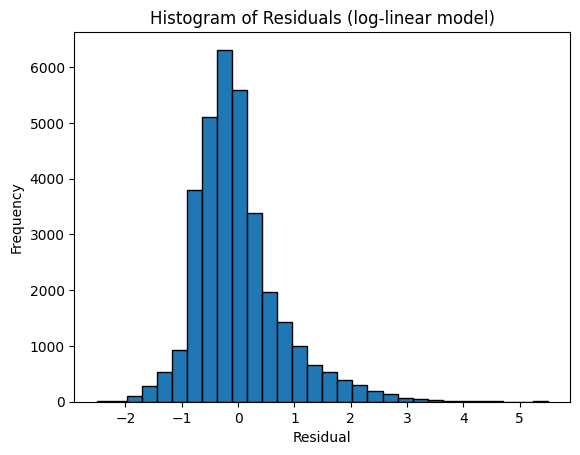

In [61]:
# Plotting histogram of residuals
residuals = model.resid
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (log-linear model)')
plt.show()

In [62]:
# TODO 16: extract regression coefficients and covariance matrix

# Regression coefficients
coefficients = model.params 

# Covariance matrix
cov_matrix = model.cov_params()

# Number of simulations
n_simulations = 1000

# Simulate beta coefficients
simulated_betas = np.random.multivariate_normal(coefficients, cov_matrix, size=n_simulations)

#. Your solution here ...

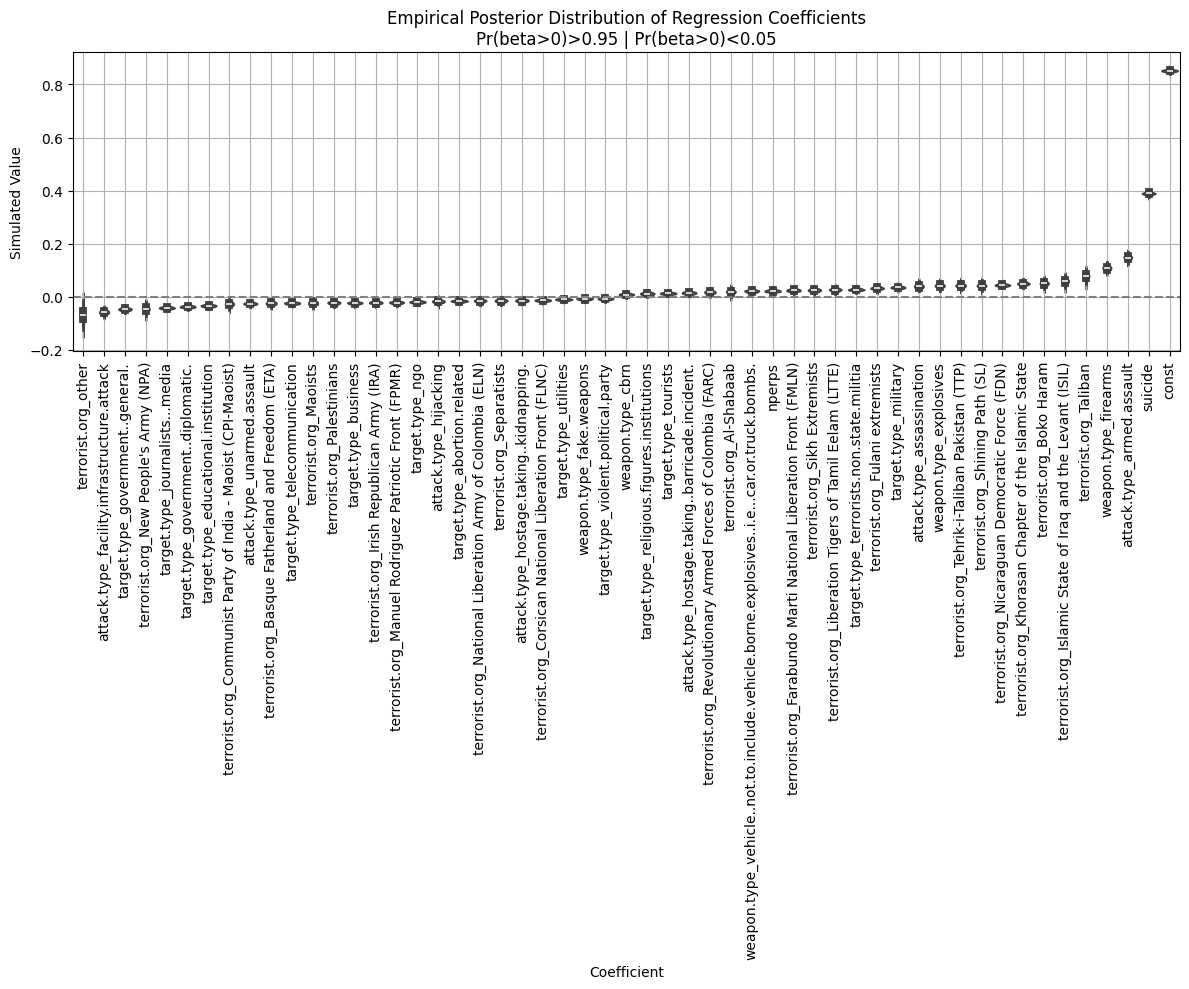

In [63]:
# TODO 17: Draw a Violin Plot

#. Your solution here ...
# Transform simulated_betas into a DataFrame for plotting
simulations_df = pd.DataFrame(simulated_betas, columns=model.params.index)

# Convert the DataFrame from wide to long format
long_df = simulations_df.melt(var_name='Coefficient', value_name='Value')

# Calculate the probability of coef > 0 for each coefficient
prob_greater_than_zero = long_df.groupby('Coefficient')['Value'].apply(lambda x: np.mean(x > 0)).reset_index()
prob_greater_than_zero.rename(columns={'Value': 'P(coef>0)'}, inplace=True)

# Filter coefficients based on the probability criterion
filtered_coefs = prob_greater_than_zero[
    (prob_greater_than_zero['P(coef>0)'] > 0.95) | (prob_greater_than_zero['P(coef>0)'] < 0.05)
]['Coefficient']

# Filter the long_df to include only the selected coefficients
filtered_long_df = long_df[long_df['Coefficient'].isin(filtered_coefs)]

# Calculate the median of the simulated values for each filtered coefficient
medians = filtered_long_df.groupby('Coefficient')['Value'].median().reset_index()

# Sort the filtered medians
medians_sorted = medians.sort_values(by='Value')

# Plotting the filtered and ordered coefficients
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.violinplot(x='Coefficient', y='Value', data=filtered_long_df, order=medians_sorted['Coefficient'])

# Add a vertical dotted line at x = 0
plt.axhline(y=0, color='grey', linestyle='--')

# Additional customization
plt.title('Empirical Posterior Distribution of Regression Coefficients\nPr(beta>0)>0.95 | Pr(beta>0)<0.05')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.xlabel('Coefficient')
plt.ylabel('Simulated Value')
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

In [64]:
# Initialize an array to store predictions from each simulation
predicted_counts = np.zeros((n_simulations, X_encoded_with_const.shape[0]))

In [65]:
# TODO 18: Generate predictions for each simulation
# 1. Loop over the number of simulations
# 2. Calculate the predicted rate for each simulation using the simulated coefficients and the data
# 3. Generate the predicted counts by sampling from a normal distribution with the predicted rate and the model scale
# 4. Fill in the i-th position of predicted_counts with the predicted counts
for i in range(n_simulations):
    beta_simulation = simulated_betas[i]
    predicted_log_rate = np.dot(X_encoded_with_const, beta_simulation)
    # Simulate from the posterior-predictive distirbution 
    # Uncomment next line
    predicted_counts[i] = np.exp(np.random.normal(predicted_log_rate,np.sqrt(model.scale)))

    #. Your solution here ...

In [66]:
from sklearn.metrics import mean_squared_error

# TODO 19: Calculate metrics
monte_carlo_medians = np.mean(predicted_counts,axis=0)   # np.median(...)
prediction_intervals = np.percentile(predicted_counts, [2.5, 97.5], axis=0)  # np.percentile(...)

# Calculate correlation, rmse, bias, and coverage
correlation = np.corrcoef(monte_carlo_medians, y_cleaned)[0, 1]   # np.corrcoef(...)[0, 1]
rmse = np.sqrt(mean_squared_error(y_cleaned, monte_carlo_medians))          # np.sqrt(mean_squared_error(...))
bias = np.mean(monte_carlo_medians - y_cleaned)          # np.mean(...)  # Mean prediction error
coverage = np.mean((y_cleaned >= prediction_intervals[0,:]) & (y_cleaned <= prediction_intervals[1,:])) 

#. Your solution here ...

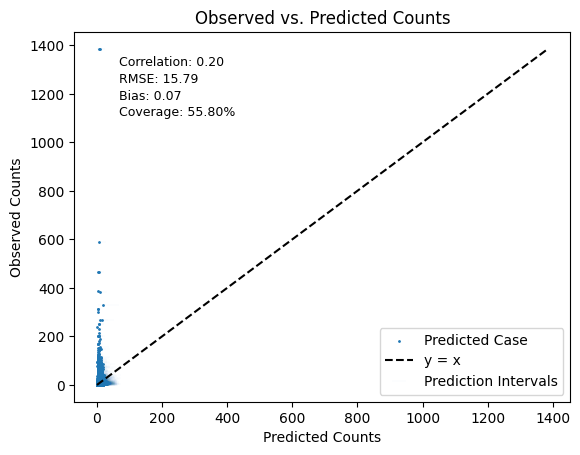

In [67]:
# # # Find overall min and max for xlim and ylim

# Flatten predicted_samples to make it 1-dimensional
predicted_counts_flat = predicted_counts.flatten()

# Concatenate the flattened predicted_samples with y
combined_array = np.concatenate([predicted_counts_flat, y_cleaned])

# calculate min and max
min_val = combined_array.min()
max_val = combined_array.max()

# Plotting
scatter = plt.scatter(monte_carlo_medians, y_cleaned, s=1, alpha=1, label='Predicted Case')
errorbar = plt.errorbar(monte_carlo_medians, y_cleaned, xerr=np.abs(prediction_intervals - monte_carlo_medians), fmt='none', alpha=0.01, label='Prediction Intervals')
y_equals_x = plt.plot([min_val, max_val], [min_val, max_val], 'k--', zorder=3, label='y = x')

# Add legend with metrics
legend_labels = [
    f'Correlation: {correlation:.2f}',
    f'RMSE: {rmse:.2f}',
    f'Bias: {bias:.2f}',
    f'Coverage: {coverage:.2%}'
]

# Add legend for plot elements
plt.legend(loc='lower right')

# Text annotations for metrics
text_x = min_val + (max_val - min_val) * 0.05  # Adjust these positions as necessary
text_y_start = max_val - (max_val - min_val) * 0.05  # Starting y position for text
line_height = (max_val - min_val) * 0.05  # Adjust line height as necessary

for i, label in enumerate(legend_labels):
    plt.text(text_x, text_y_start - i * line_height, label, fontsize=9)

plt.title('Observed vs. Predicted Counts')
plt.xlabel('Predicted Counts')
plt.ylabel('Observed Counts')
plt.show()


### Part 4: Poisson Regression

Repeat the above from the model fitting onwards, but change the distribution of the depedent variable from normal to Poisson. You can fit a poisson regression using the GLM module of the statsmodels library. Comment on which of the three regression models is most useful for this application and why. 

In [68]:
from statsmodels.api import GLM, Poisson
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

# TODO 20: Fitting the linear regression model
# use function GLM with family=sm.families.Poisson()
model = sm.GLM(y_cleaned, X_encoded_with_const, family=sm.families.Poisson()).fit()

#. Your solution here ...

# Displaying the regression results
print(model.summary())

/var/folders/2g/xfsvxxmd2158x4mn_qg2ycpr0000gn/T/ipykernel_37242/345226668.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  nkill   No. Observations:                32775
Model:                            GLM   Df Residuals:                    32710
Model Family:                 Poisson   Df Model:                           64
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.5821e+05
Date:                Fri, 28 Mar 2025   Deviance:                   2.5765e+05
Time:                        23:39:32   Pearson chi2:                 9.32e+05
No. Iterations:                    17   Pseudo R-squ. (CS):             0.9670
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------

In [69]:
# TODO 21: extract regression coefficients and covariance matrix

# Extract regression coefficients
beta_mean = model.params

# Extract covariance matrix
beta_cov = model.cov_params()

# Number of simulations
n_simulations = 1000

# Simulate beta coefficients
simulated_betas = multivariate_normal.rvs(mean=beta_mean, cov=beta_cov, size=n_simulations)

#. Your solution here ...

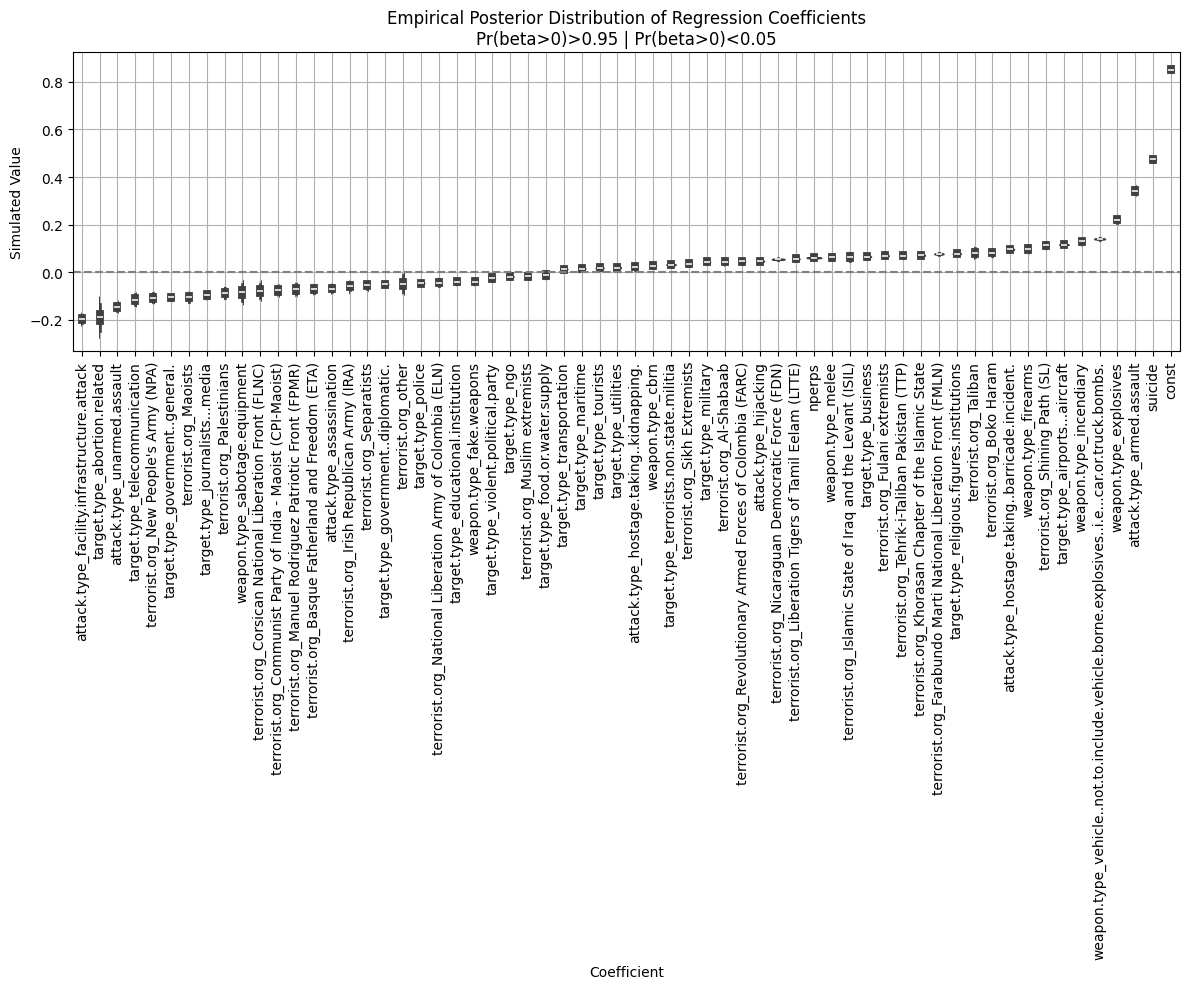

In [70]:
# Transform simulated_betas into a DataFrame for plotting
simulations_df = pd.DataFrame(simulated_betas, columns=model.params.index)

# Convert the DataFrame from wide to long format
long_df = simulations_df.melt(var_name='Coefficient', value_name='Value')

# Calculate the probability of coef > 0 for each coefficient
prob_greater_than_zero = long_df.groupby('Coefficient')['Value'].apply(lambda x: np.mean(x > 0)).reset_index()
prob_greater_than_zero.rename(columns={'Value': 'P(coef>0)'}, inplace=True)

# Filter coefficients based on the probability criterion
filtered_coefs = prob_greater_than_zero[
    (prob_greater_than_zero['P(coef>0)'] > 0.95) | (prob_greater_than_zero['P(coef>0)'] < 0.05)
]['Coefficient']

# Filter the long_df to include only the selected coefficients
filtered_long_df = long_df[long_df['Coefficient'].isin(filtered_coefs)]

# Calculate the median of the simulated values for each filtered coefficient
medians = filtered_long_df.groupby('Coefficient')['Value'].median().reset_index()

# Sort the filtered medians
medians_sorted = medians.sort_values(by='Value')


# Plotting the filtered and ordered coefficients
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.violinplot(x='Coefficient', y='Value', data=filtered_long_df, order=medians_sorted['Coefficient'])

# Add a vertical dotted line at x = 0
plt.axhline(y=0, color='grey', linestyle='--')

# Additional customization
plt.title('Empirical Posterior Distribution of Regression Coefficients\nPr(beta>0)>0.95 | Pr(beta>0)<0.05')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.xlabel('Coefficient')
plt.ylabel('Simulated Value')
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

In [71]:
# TODO 22: Initialize an array to store predictions from each simulation
predicted_counts = np.zeros((n_simulations, X_encoded_with_const.shape[0]))

#. Your solution here ...

In [72]:
# Generate predictions for each simulation
for i in range(n_simulations):
    beta_simulation = simulated_betas[i]
    predicted_rate = np.exp(np.dot(X_encoded_with_const, beta_simulation))
    predicted_counts[i] = np.random.poisson(predicted_rate)

In [73]:
from sklearn.metrics import mean_squared_error

# TODO 23:Calculate metrics
monte_carlo_medians = np.mean(predicted_counts,axis=0)   # np.median(...)
prediction_intervals = np.percentile(predicted_counts, [2.5, 97.5], axis=0)  # np.percentile(...)

# Calculate correlation, rmse, bias, and coverage
correlation = np.corrcoef(monte_carlo_medians, y_cleaned)[0, 1]   # np.corrcoef(...)[0, 1]
rmse = np.sqrt(mean_squared_error(y_cleaned, monte_carlo_medians))          # np.sqrt(mean_squared_error(...))
bias = np.mean(monte_carlo_medians - y_cleaned)          # np.mean(...)  # Mean prediction error
coverage = np.mean((y_cleaned >= prediction_intervals[0,:]) & (y_cleaned <= prediction_intervals[1,:])) 
#. Your solution here ...

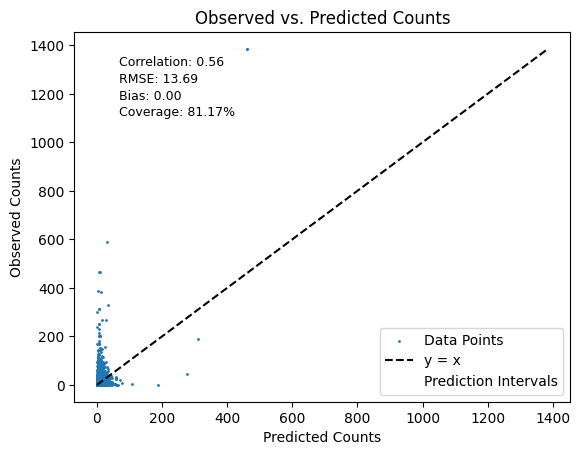

In [74]:
# TODO 24: Plot Predictions v. Observations

#. Your solution here ...
# Flatten predicted_samples to make it 1-dimensional
predicted_counts_flat = predicted_counts.flatten()

# Concatenate the flattened predicted_samples with y
combined_array = np.concatenate([predicted_counts_flat, y_cleaned])

# calculate min and max
min_val = combined_array.min()
max_val = combined_array.max()

# Plotting
scatter = plt.scatter(monte_carlo_medians, y_cleaned, s=1, alpha=1, label='Data Points')
errorbar = plt.errorbar(monte_carlo_medians, y_cleaned, xerr=np.abs(prediction_intervals - monte_carlo_medians), fmt='none', alpha=0.01, label='Prediction Intervals')
y_equals_x = plt.plot([min_val, max_val], [min_val, max_val], 'k--', zorder=3, label='y = x')

# Add legend with metrics
legend_labels = [
    f'Correlation: {correlation:.2f}',
    f'RMSE: {rmse:.2f}',
    f'Bias: {bias:.2f}',
    f'Coverage: {coverage:.2%}'
]

# Add legend for plot elements
plt.legend(loc='lower right')

# Text annotations for metrics
text_x = min_val + (max_val - min_val) * 0.05  # Adjust these positions as necessary
text_y_start = max_val - (max_val - min_val) * 0.05  # Starting y position for text
line_height = (max_val - min_val) * 0.05  # Adjust line height as necessary

for i, label in enumerate(legend_labels):
    plt.text(text_x, text_y_start - i * line_height, label, fontsize=9)

plt.title('Observed vs. Predicted Counts')
plt.xlabel('Predicted Counts')
plt.ylabel('Observed Counts')
plt.show()

Comment on which of the three regression models is most useful for this application and why.

#!# BEGIN ANSWER
The Poisson regression model displays better correlation and RMSE, largely driven by the ability to more accurately predict high-kill incidents. 
#!# END ANSWER

# SUMMATIVE ASSESSMENT

Now pick a dataset of your choice. Please ensure your dataset is a csv file under 100MB named sem4_portfolio_2_data_custom.csv

Apply any of the relevant models to a count datasets of your choice, investigate predictive power and interpret the models exhaustively.

In [75]:
# Do NOT modify the contents of this cell. Start your customization in the next one!
custom_data_path = "sem4_portfolio_2_data_custom.csv"
custom_df = pd.read_csv(custom_data_path)

## Part_1: Clean and visualize the data

In [76]:
custom_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00000,Sports,Nintendo,41.49000,29.02000,3.77000,8.46000,82.74000
1,2,Super Mario Bros.,NES,1985.00000,Platform,Nintendo,29.08000,3.58000,6.81000,0.77000,40.24000
2,3,Mario Kart Wii,Wii,2008.00000,Racing,Nintendo,15.85000,12.88000,3.79000,3.31000,35.82000
3,4,Wii Sports Resort,Wii,2009.00000,Sports,Nintendo,15.75000,11.01000,3.28000,2.96000,33.00000
4,5,Pokemon Red/Pokemon Blue,GB,1996.00000,Role-Playing,Nintendo,11.27000,8.89000,10.22000,1.00000,31.37000
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.00000,Platform,Kemco,0.01000,0.00000,0.00000,0.00000,0.01000
16594,16597,Men in Black II: Alien Escape,GC,2003.00000,Shooter,Infogrames,0.01000,0.00000,0.00000,0.00000,0.01000
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.00000,Racing,Activision,0.00000,0.00000,0.00000,0.00000,0.01000
16596,16599,Know How 2,DS,2010.00000,Puzzle,7G//AMES,0.00000,0.01000,0.00000,0.00000,0.01000


This dataset, sourced from vgchartz.com, offers a wealth of insights into the dynamics between platform and genre for the top 100 video games worldwide. Sales amounts are in millions.

In [77]:
# First we change the scale of sales into thousand.
custom_df['Global_Sales'] = custom_df['Global_Sales']*1000


In [78]:
# Look at the first 1000 cases to get a tangible idea of what we are working with

first_1000_cases = custom_df['Global_Sales'][:1000]

first_1000_cases = first_1000_cases.dropna()
print(first_1000_cases)

0     82740.00000
1     40240.00000
2     35820.00000
3     33000.00000
4     31370.00000
          ...    
995    1760.00000
996    1760.00000
997    1760.00000
998    1760.00000
999    1760.00000
Name: Global_Sales, Length: 1000, dtype: float64


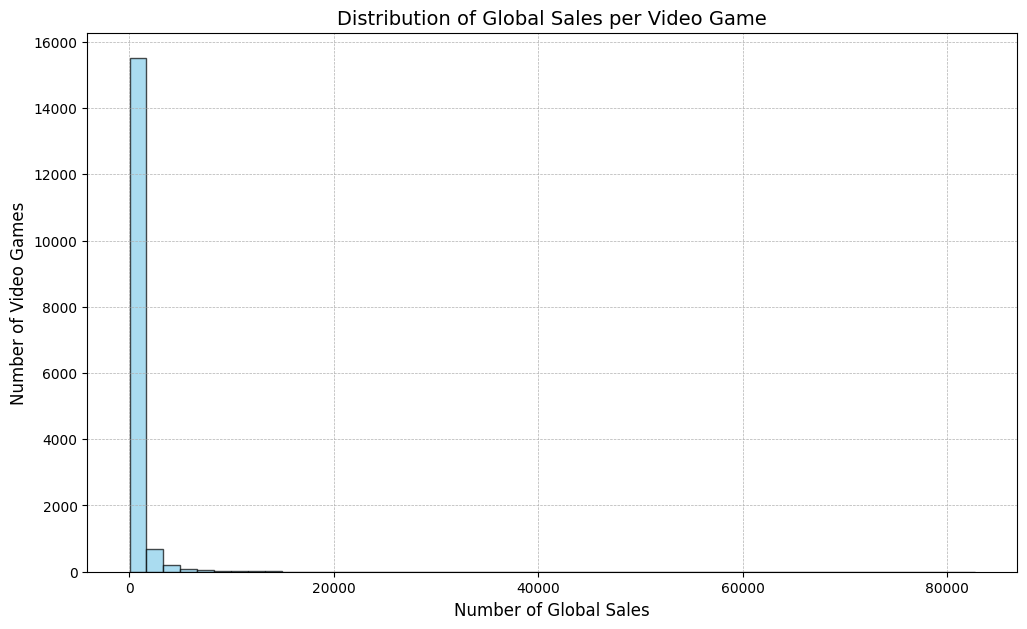

In [79]:
# Plot the histogram

plt.figure(figsize=(12, 7))
plt.hist(custom_df['Global_Sales'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Global Sales', fontsize=12)
plt.ylabel('Number of Video Games', fontsize=12)
plt.title('Distribution of Global Sales per Video Game', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

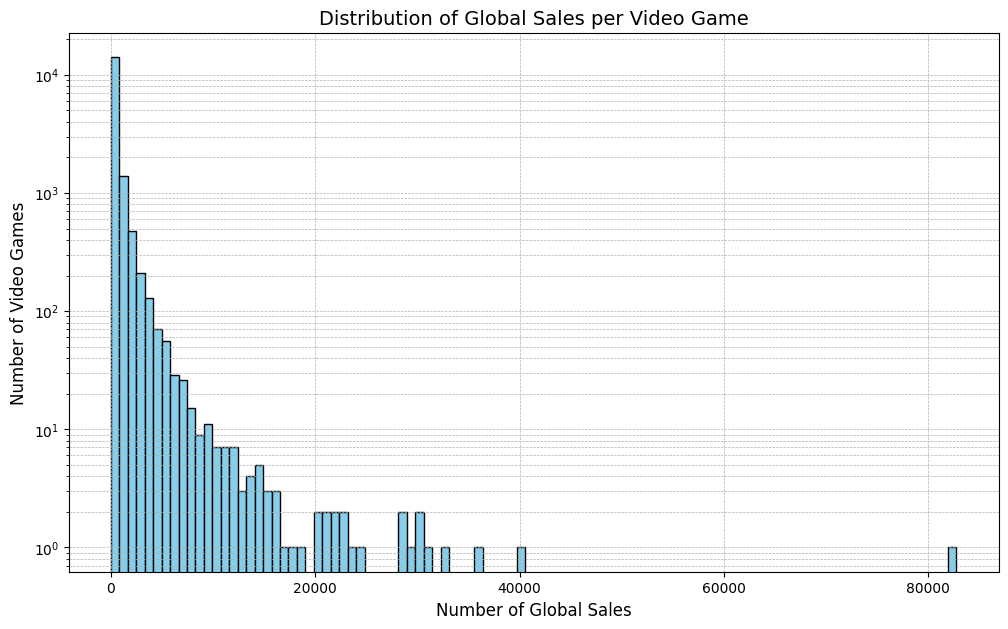

In [80]:
# Plot the histogram of the log of Global Sales

plt.figure(figsize=(12, 7))
plt.hist(custom_df['Global_Sales']+1, bins=100, color='skyblue', edgecolor='black')
plt.yscale('log')  # Log scale for better visibility of distribution
plt.xlabel('Number of Global Sales', fontsize=12)
plt.ylabel('Number of Video Games', fontsize=12)
plt.title('Distribution of Global Sales per Video Game', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

## Part_2: Fit the Poisson Regression Model

In [81]:
# Select predictors and target variable before dropping missing values
X = custom_df[['Global_Sales','Platform','Publisher','Genre','NA_Sales','EU_Sales','JP_Sales']]

# Drop rows with missing values in any selected variable or the target
data_cleaned = X.dropna()

# Separate predictors and target variable after cleaning
y_cleaned = data_cleaned['Global_Sales']
y_log_cleaned = np.log(data_cleaned['Global_Sales']+1)
X_cleaned = data_cleaned.drop(columns=['Global_Sales'])

In [82]:
# One-hot encoding categorical variables and dropping the first dummy to avoid multicollinearity
X_encoded = pd.get_dummies(X_cleaned, columns=['Platform','Publisher','Genre'],drop_first=True).astype(int)

In [83]:
# Drop variables with 0 variability (no information) (I will do this for you because you haven't used this before)

# VarianceThreshold with a threshold of 0 (default) to remove 0 variance columns
selector = VarianceThreshold()
X_encoded_var_filtered = selector.fit_transform(X_encoded)
# Get the columns after variance thresholding
X_encoded_var_filtered = X_encoded.iloc[:, selector.get_support(indices=True)]

In [84]:
# Calculate the correlation matrix
corr_matrix = X_encoded_var_filtered.corr().abs()

# Select upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Initialize an empty list to keep track of columns to drop
to_drop = []# Calculate the correlation matrix (absolute value - we don't care about direction of correlation)
corr_matrix = X_encoded_var_filtered.corr().abs()

# Select upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Initialize an empty list to keep track of columns to drop
to_drop = []

# Iterate over the columns of the upper triangle
for column in upper_tri.columns:
    for row in upper_tri.index:
        # Check if the correlation is above the threshold and the column hasn't been considered yet
        if upper_tri.loc[row, column] > 0.9 and column not in to_drop and row not in to_drop:
            to_drop.append(column)
            break  # Break the loop once a column is marked for dropping

# 'to_drop' contains columns where only one of each highly correlated pair is considered for dropping

# Iterate over the columns of the upper triangle
for column in upper_tri.columns:
    for row in upper_tri.index:
        # Check if the correlation is above the threshold and the column hasn't been considered yet
        if upper_tri.loc[row, column] > 0.9 and column not in to_drop and row not in to_drop:
            to_drop.append(column)
            break  # Break the loop once a column is marked for dropping

# 'to_drop' contains columns where only one of each highly correlated pair is considered for dropping

In [85]:
# Drop highly correlated features 
X_encoded_final = X_encoded_var_filtered.drop(columns=to_drop)

In [86]:
# Standardise features to help with interpretation (Again I will do this for you because you haven't seen this before.)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_encoded_final)

# Apply transform to both the training set and the test set
X_train_scaled = pd.DataFrame(scaler.transform(X_encoded_final), columns=X_encoded_final.columns, index=X_encoded_final.index)

In [87]:
# Adding a constant for the intercept
X_encoded_with_const = sm.add_constant(X_train_scaled)

In [88]:
from statsmodels.api import GLM, Poisson
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

# Fitting the linear regression model
# use function GLM with family=sm.families.Poisson()
model = sm.GLM(y_log_cleaned, X_encoded_with_const, family=sm.families.Poisson()).fit()

# Displaying the regression results
print(model.summary())

/var/folders/2g/xfsvxxmd2158x4mn_qg2ycpr0000gn/T/ipykernel_37242/99703392.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


                 Generalized Linear Model Regression Results                  
Dep. Variable:           Global_Sales   No. Observations:                16540
Model:                            GLM   Df Residuals:                    15918
Model Family:                 Poisson   Df Model:                          621
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30657.
Date:                Fri, 28 Mar 2025   Deviance:                       3806.0
Time:                        23:40:35   Pearson chi2:                 3.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1639
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [89]:
# Extract regression coefficients and covariance matrix

# Extract parameters
beta_mean = model.params
beta_cov = model.cov_params()

# Number of simulations
n_simulations = 1000

# Simulate beta coefficients
simulated_betas = multivariate_normal.rvs(mean=beta_mean, cov=beta_cov, size=n_simulations)

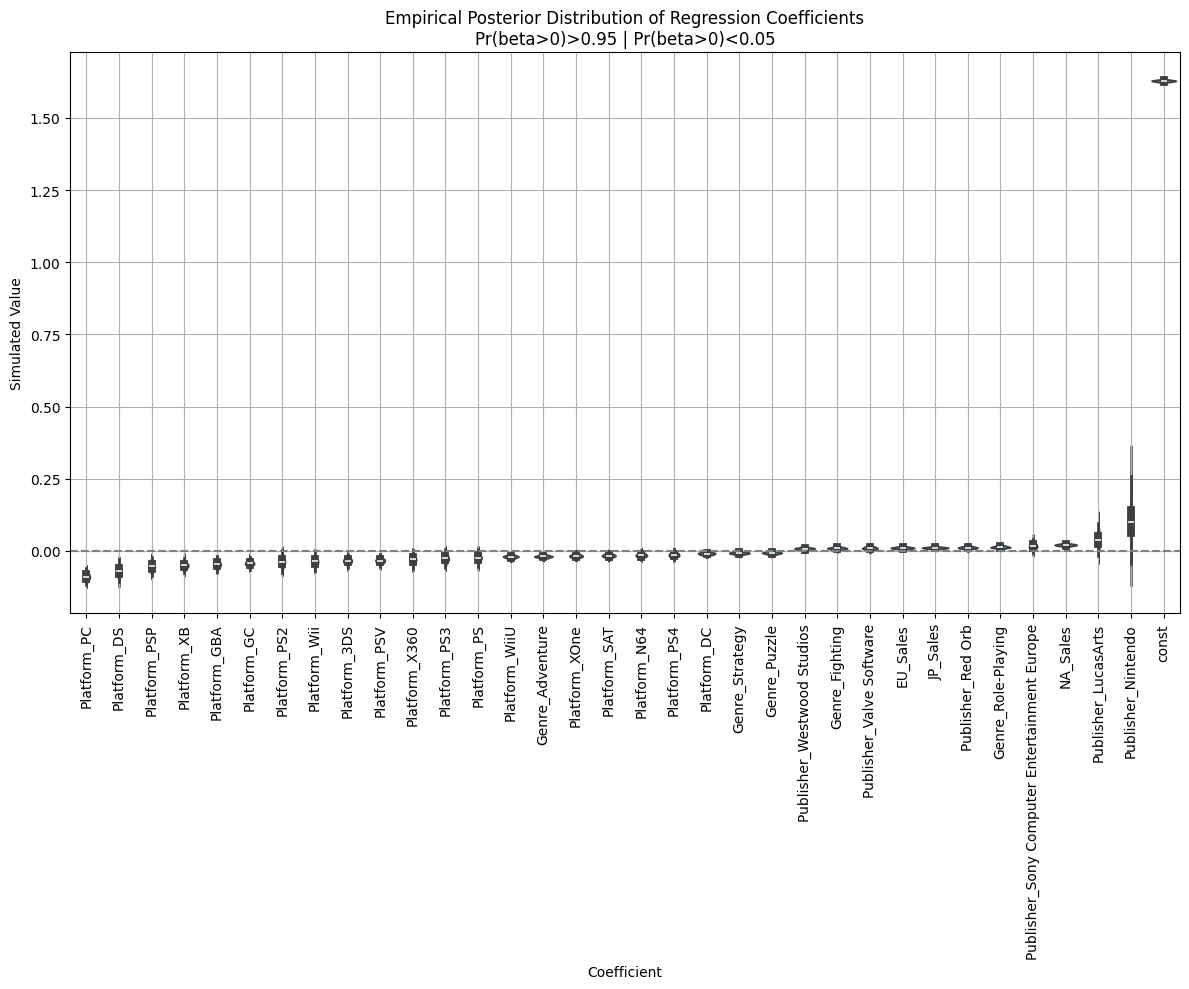

In [90]:
# Transform simulated_betas into a DataFrame for plotting
simulations_df = pd.DataFrame(simulated_betas, columns=model.params.index)

# Convert the DataFrame from wide to long format
long_df = simulations_df.melt(var_name='Coefficient', value_name='Value')

# Calculate the probability of coef > 0 for each coefficient
prob_greater_than_zero = long_df.groupby('Coefficient')['Value'].apply(lambda x: np.mean(x > 0)).reset_index()
prob_greater_than_zero.rename(columns={'Value': 'P(coef>0)'}, inplace=True)

# Filter coefficients based on the probability criterion
filtered_coefs = prob_greater_than_zero[
    (prob_greater_than_zero['P(coef>0)'] > 0.95) | (prob_greater_than_zero['P(coef>0)'] < 0.05)
]['Coefficient']

# Filter the long_df to include only the selected coefficients
filtered_long_df = long_df[long_df['Coefficient'].isin(filtered_coefs)]

# Calculate the median of the simulated values for each filtered coefficient
medians = filtered_long_df.groupby('Coefficient')['Value'].median().reset_index()

# Sort the filtered medians
medians_sorted = medians.sort_values(by='Value')


# Plotting the filtered and ordered coefficients
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.violinplot(x='Coefficient', y='Value', data=filtered_long_df, order=medians_sorted['Coefficient'])

# Add a vertical dotted line at x = 0
plt.axhline(y=0, color='grey', linestyle='--')

# Additional customization
plt.title('Empirical Posterior Distribution of Regression Coefficients\nPr(beta>0)>0.95 | Pr(beta>0)<0.05')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.xlabel('Coefficient')
plt.ylabel('Simulated Value')
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

In [91]:
# Initialize an array to store predictions from each simulation
predicted_counts = np.zeros((n_simulations, X_encoded_with_const.shape[0]))

In [93]:
# Generate predictions for each simulation
for i in range(n_simulations):
    beta_simulation = simulated_betas[i]
    predicted_rate = np.exp(np.dot(X_encoded_with_const, beta_simulation))
    predicted_counts[i] = np.random.normal(predicted_rate,np.sqrt(model.scale))

In [94]:
from sklearn.metrics import mean_squared_error

# Calculate metrics
monte_carlo_medians = np.mean(predicted_counts,axis=0)   
prediction_intervals = np.percentile(predicted_counts, [2.5, 97.5], axis=0)  

# Calculate correlation, rmse, bias, and coverage
correlation = np.corrcoef(monte_carlo_medians, np.log(y_cleaned+1))[0, 1]  
rmse = np.sqrt(mean_squared_error(np.log(y_cleaned+1), monte_carlo_medians))         
bias = np.mean(monte_carlo_medians - np.log(y_cleaned+1))         
coverage = np.mean((np.log(y_cleaned+1) >= prediction_intervals[0,:]) & (np.log(y_cleaned+1) <= prediction_intervals[1,:])) 

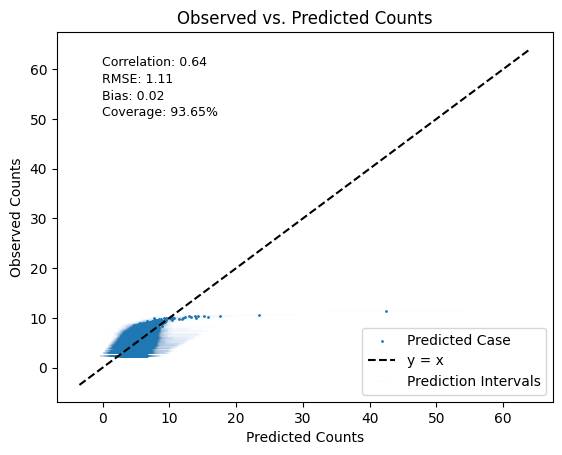

In [95]:
# Plot Predictions v. Observations

# Flatten predicted_samples to make it 1-dimensional
predicted_counts_flat = predicted_counts.flatten()

# Concatenate the flattened predicted_samples with y
combined_array = np.concatenate([predicted_counts_flat, np.log(y_cleaned+1)])

# calculate min and max
min_val = combined_array.min()
max_val = combined_array.max()

# Plotting
scatter = plt.scatter(monte_carlo_medians, np.log(y_cleaned+1), s=1, alpha=1, label='Predicted Case')
errorbar = plt.errorbar(monte_carlo_medians, np.log(y_cleaned+1), xerr=np.abs(prediction_intervals - monte_carlo_medians), fmt='none', alpha=0.01, label='Prediction Intervals')
y_equals_x = plt.plot([min_val, max_val], [min_val, max_val], 'k--', zorder=3, label='y = x')

# Add legend with metrics
legend_labels = [
    f'Correlation: {correlation:.2f}',
    f'RMSE: {rmse:.2f}',
    f'Bias: {bias:.2f}',
    f'Coverage: {coverage:.2%}'
]

# Add legend for plot elements
plt.legend(loc='lower right')

# Text annotations for metrics
text_x = min_val + (max_val - min_val) * 0.05  # Adjust these positions as necessary
text_y_start = max_val - (max_val - min_val) * 0.05  # Starting y position for text
line_height = (max_val - min_val) * 0.05  # Adjust line height as necessary

for i, label in enumerate(legend_labels):
    plt.text(text_x, text_y_start - i * line_height, label, fontsize=9)

plt.title('Observed vs. Predicted Counts')
plt.xlabel('Predicted Counts')
plt.ylabel('Observed Counts')
plt.show()

- Correlation: 0.64<br>
This measures the strength of the relationship between predicted and observed counts. A value of 0.64 shows a moderate positive relationship—predictions generally align with observations, but the fit isn’t very tight, suggesting some unexplained variability.
<br>
- RMSE (Root Mean Squared Error): 1.11<br>
This is the average prediction error in counts. An RMSE of 1.11 means predictions are off by about 1.11 counts on average. Given the count range (0 to 60), this is reasonable but indicates some error, especially for higher counts.
<br>
- Bias: 0.02<br>
Bias shows the average difference between predicted and observed counts. A bias of 0.02 means the model slightly overpredicts by 0.02 counts on average—essentially negligible, indicating well-balanced predictions.
<br>
- Coverage: 93.65%<br>
This is the percentage of observed counts falling within the prediction intervals (shaded areas). A coverage of 93.65% (close to the ideal 95%) means the model’s uncertainty estimates are very reliable, capturing most observed values.